In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation

In [2]:
PVC_H=104.5/100
BLACK_H=115/100

In [3]:
# load json data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return [
        (
            (
                t["odom"]["pose"]["pose"]['position']['x'],
                t["odom"]["pose"]["pose"]['position']['y'],
                t["odom"]["pose"]["pose"]['position']['z']
            ),
            (
                t["odom"]["pose"]["pose"]['orientation']['x'],
                t["odom"]["pose"]["pose"]['orientation']['y'],
                t["odom"]["pose"]["pose"]['orientation']['z'],
                t["odom"]["pose"]["pose"]['orientation']['w']
            ),
    
        ) for t in data 
    ]

In [ ]:
def get_transform_mat(data):
    pose = data[0]
    rotation = Rotation.from_quat(data[1]).as_matrix()
    
    ret = np.eye(4)
    ret[:3,:3] = rotation
    ret[:3,3] = pose
    print(ret)
    return ret

def get_transformed_data(data_1):
    init_pos = np.array([-0.045, 0.0, 0, 1])
    data0 = [(get_transform_mat(x)@init_pos)[:3] for x in data_1]
    data1 = [x[0] for x in data_1]
    return data0, data1

def plt_exp(data, gt, initial_y, data2=None):
    plt.figure(figsize=(12,5)) 
    base_x=data[0][0]
    base_y=data[0][1]
    
    #Initial distance between t1 and t2
    t1_pos=np.array([-initial_y,base_y])
    dist=np.linalg.norm(t1_pos-np.array([data[0][0],data[0][1]]))
    print(dist)
    plt.subplot(1,2,1)
    points=[]
    for idx in range(len(data)):
        x=data[idx][0]
        y=data[idx][1]
        points.append([x,y])
        plt.scatter(x,y, color="blue", s=10)
        plt.text(x, y, str(idx+1), fontsize=10, color="red")
    plt.scatter(t1_pos[0], t1_pos[1], color="red", s=10)
    
    err=[]
    for measuredDist, slamLoc in zip(gt, points):
        # dist= ((slamLoc[0]-t1_pos[0])**2+(slamLoc[1]-t1_pos[1])**2)**0.5
        # real_dist=(0.05**2+dist**2)**0.5
        # err.append((measuredDist-real_dist))
        
        dist=np.linalg.norm(np.array(slamLoc)-np.array(t1_pos))
        err.append((measuredDist-dist))
    
    if data2 is not None:
        points2=[]
        err2=[]
        for idx in range(len(data2)):
            x=data2[idx][0]
            y=data2[idx][1]#+0.04
            points2.append([x,y])
            plt.scatter(x,y,marker='x', color="red", s=10)
            plt.text(x, y, str(idx+1), fontsize=10, color="red")

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.title("Rover location")
    
    plt.subplot(1,2,2)

    plt.plot(range(1,len(err)+1),err, '.')
    # plt.ylim([-0.15,0.10])
    plt.xlabel("Exp stop number")
    plt.ylabel("Error")
    plt.grid()
    
    if data2 is not None:

        for measuredDist, slamLoc in zip(gt, points2):
            # dist= ((slamLoc[0]-t1_pos[0])**2+(slamLoc[1]-t1_pos[1])**2)**0.5
            # real_dist=(0.05**2+dist**2)**0.5
            # err2.append((measuredDist-real_dist))
            
            dist=np.linalg.norm(np.array(slamLoc)-np.array(t1_pos))
            err2.append((measuredDist-dist))
            plt.plot(range(1,len(err2)+1),err2, 'x')


    plt.show()

In [5]:
data_1=load_json('Oct6_1.json')
data_2=load_json('Oct6_2.json')
data_3=load_json('Oct6_3.json')

data1, prev_data1 = get_transformed_data(data_1)
data2, prev_data2 = get_transformed_data(data_2)
data3, prev_data3 = get_transformed_data(data_3)



o6e1 = np.array([42, 61.2, 79.1,98.4,
    104.2, 106.4, 111.6, 119.2, 128.1,
    125.8, 107, 87.9, 82.9, 79.5,
    82.3, 89.3, 99.4, 104.3
])/100

o6e2 = np.array([43.9, 63.3, 82.3,101.8,
    107.6, 111.3, 117.7, 126.8, 137.7,
    137.8, 126.1, 114.6, 109.9, 93.8,
    79.2, 66.9, 59.5, 60.5
])/100

o6e3 = np.array([42.3, 61.7, 81.7,101.2,
    105.9, 109.5, 115.7, 124, 134.5,
    133.7, 121.6, 109.6, 102.8, 89.2,
    80.3, 75.4, 75.2, 80.6
])/100

[[ 0.99982117  0.01831359  0.00471663  0.11075947]
 [-0.01841558  0.99957555  0.02257422 -0.02901379]
 [-0.00430122 -0.02265704  0.99973404 -0.03570147]
 [ 0.          0.          0.          1.        ]]
[[ 0.9996856   0.0235893  -0.00850032  0.30682629]
 [-0.02351674  0.99968699  0.00853736 -0.03768892]
 [ 0.00869905 -0.00833477  0.99992743 -0.07164614]
 [ 0.          0.          0.          1.        ]]
[[ 0.99874173  0.04875075 -0.01176088  0.48504803]
 [-0.0486824   0.99879611  0.00602946 -0.04333446]
 [ 0.01204066 -0.00544933  0.99991266 -0.08381611]
 [ 0.          0.          0.          1.        ]]
[[ 9.97293481e-01  7.35235328e-02 -5.14579420e-05  7.49379396e-01]
 [-7.35232129e-02  9.97290775e-01  2.33380165e-03 -4.01546322e-02]
 [ 2.22907873e-04 -2.32370182e-03  9.99997275e-01 -1.27949836e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.13583316  0.98989457 -0.04071979  0.80953962]
 [-0.98779216  0.13847948  0.07134485 -0.19043131]
 [ 0.07626273 

In [6]:
len(data_3)


18

0.37485426196393523


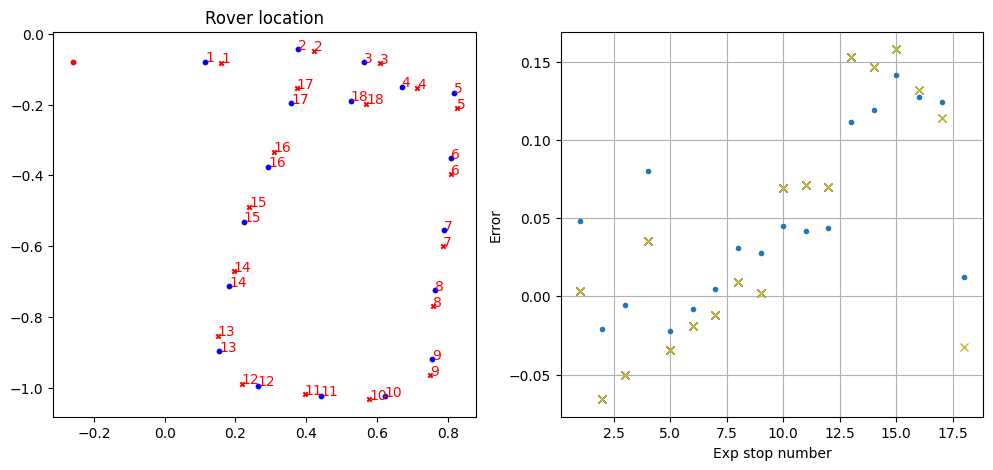

In [14]:
plt_exp(data3, o6e3, 0.26, prev_data3)

In [8]:
data2[0]

array([ 0.11950995, -0.00957867, -0.04882803])

In [9]:
for i in range(1,len(data2)):
    dist=np.linalg.norm(data2[i]-data2[i-1])
    print(dist)

0.16234484851654346
0.1827680824998301
0.1793325606085601
0.21122183789244678
0.1873976549538186
0.22085222272977434
0.1927549185736641
0.17794962986639237
0.20306801170603617
0.190488254506952
0.20567159221927953
0.12593038413513508
0.18080058320705092
0.16600262159418527
0.1928389958250556
0.22348380044414576
0.18584302831756228
